In [ ]:
!pip install -U langsmith openai

In [ ]:
import os
LANGCHAIN_API_KEY = "ls__xxxxxx"  # LangChain API Key
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"  #LangSmith的服务端点

os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="official-001" #自定义项目名称

In [ ]:
# 设置OpenAI KEY环境变量
import os
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

OpenAI API Key:··········


In [ ]:
import openai
from langsmith.wrappers import wrap_openai
from langsmith import traceable

# Auto-trace LLM calls in-context
client = wrap_openai(openai.Client())

@traceable # Auto-trace this function
def pipeline(user_input: str):
    result = client.chat.completions.create(
        messages=[{"role": "user", "content": user_input}],
        model="gpt-3.5-turbo"
    )
    return result.choices[0].message.content

pipeline("Hello, world!")
# Out:  Hello there! How can I assist you today?

'Hello! How can I assist you today?'

我们可以在LangSmith中查看执行结果：

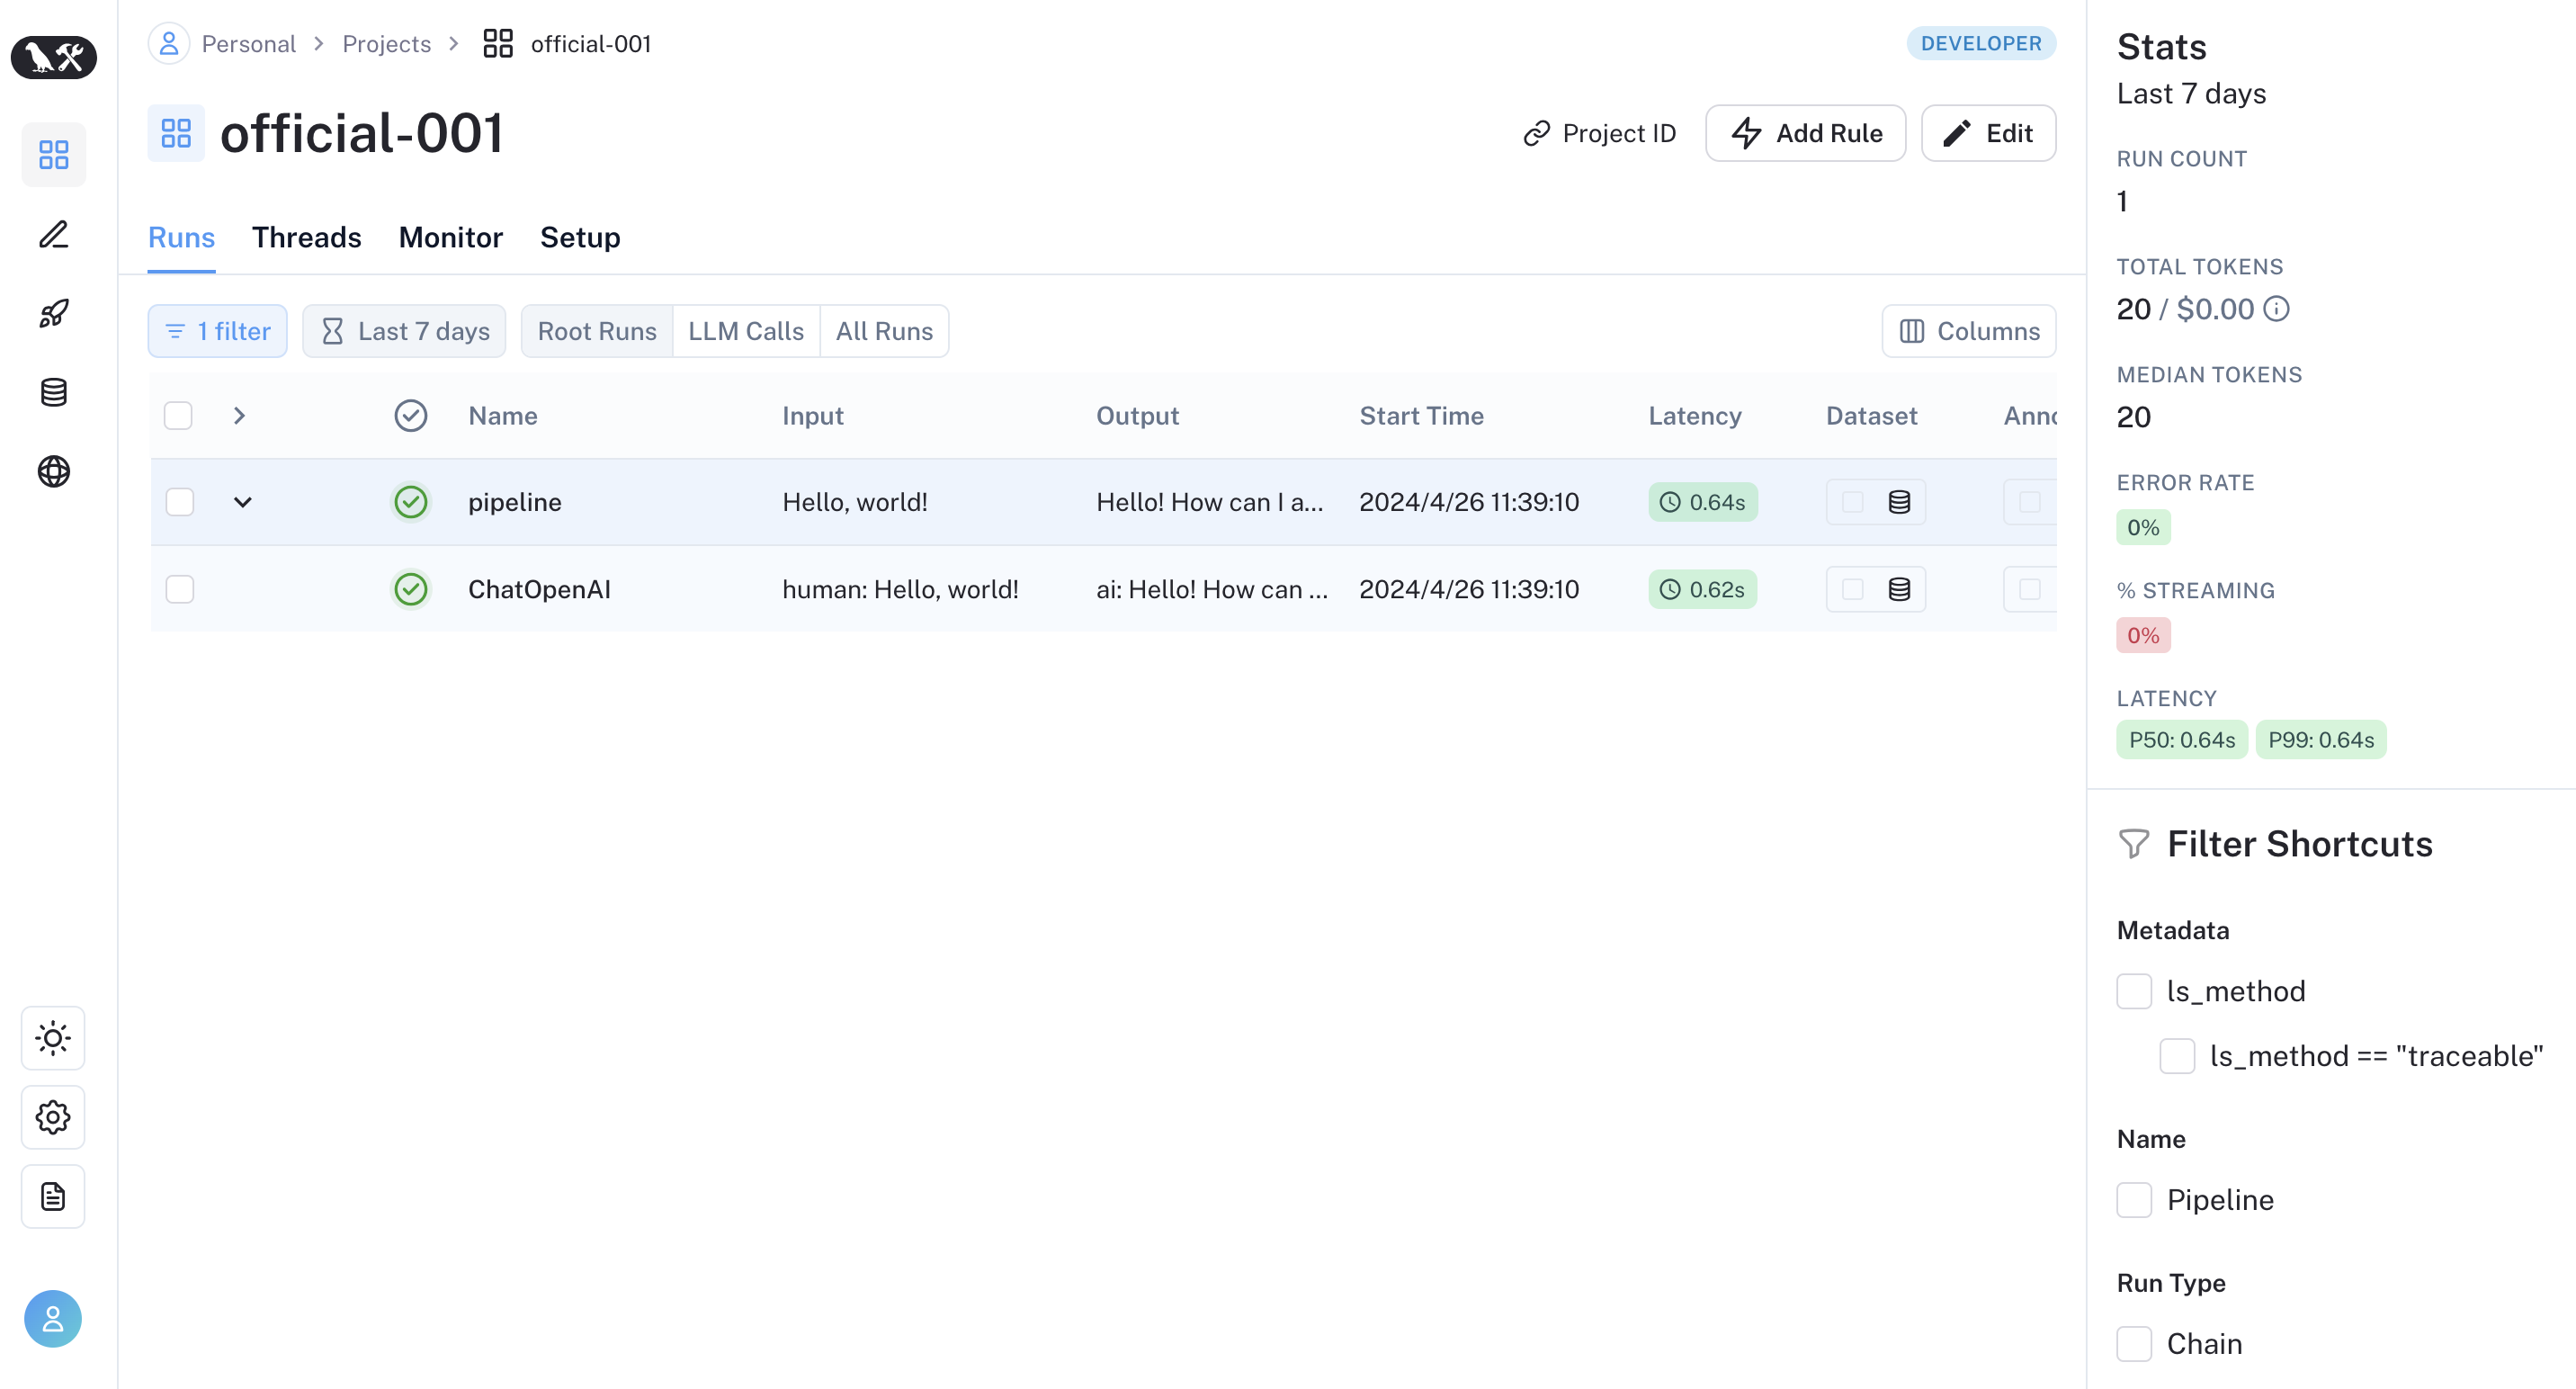